# Exploratory Data Analysis (EDA) & Business Insights  
### Project: Real Estate Investment Advisor – India Housing Prices

**Goal of this notebook**

1. Load the feature-engineered dataset `india_housing_cleaned.csv`.
2. Explore price, size, location, and property characteristics.
3. Generate at least **20 visualizations** grouped into:
   - Price & Size Analysis (Q1–5)
   - Location-based Analysis (Q6–10)
   - Feature Relationships & Correlations (Q11–15)
   - Investment / Amenities / Ownership Analysis (Q16–20)
4. After each chart, capture **short business insights** that will be used later in the project report.


# Imports & Paths

In [2]:

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Configure display settings for readability
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

# Improve visualization appearance
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Mounting Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Path to the cleaned dataset

In [4]:

DATA_PATH = "/content/drive/MyDrive/Real_Estate_Investment_Advisor/data/processed/india_housing_cleaned.csv"

print("Using data from:", DATA_PATH)

Using data from: /content/drive/MyDrive/Real_Estate_Investment_Advisor/data/processed/india_housing_cleaned.csv


# Load Data & Quick Peek

In [5]:
df = pd.read_csv(DATA_PATH)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)

# Display first rows to confirm structure
df.head()

Dataset Loaded Successfully!
Shape: (250000, 37)


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Annual_Growth_Rate,Future_Price_5Y,City_Median_Price,City_Median_PPS,score_price_le_median,score_pps_le_median,score_bhk_ge_3,score_parking,score_pt_access,score_security,score_availability,Investment_Score,Good_Investment,Amenities_Count
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,10332.489451,1990,Furnished,22,1,35,10,3,3,0,0,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,1,0.07,686.913736,256.915,9328.557474,False,False,False,False,True,False,True,2,0,5
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,8270.727580,2008,Unfurnished,21,20,17,8,1,1,0,1,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,0,0.08,287.283026,258.930,9538.744119,True,True,True,False,False,True,False,4,1,5
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,5046.403075,1997,Semi-furnished,19,27,28,9,8,1,1,0,"Clubhouse, Pool, Playground, Gym",South,Broker,1,0.05,234.567788,249.420,9154.488518,True,True,False,True,False,False,True,4,1,4
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,10955.490697,1991,Furnished,21,26,34,5,7,3,1,1,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,1,0.06,401.855759,252.480,9269.120459,False,False,False,True,True,True,True,4,1,5
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,3792.245490,2002,Semi-furnished,3,2,23,4,9,1,0,1,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,1,0.06,244.761458,251.630,9091.432685,True,True,True,False,False,True,True,5,1,5


# Basic Overview

In [6]:
# ============================================
# 📌 Dataset Overview – Info + Summary Stats
# ============================================

# Get column types and missing value counts
print("==== Data Info ====")
df.info()

# Statistical summary for numeric columns
print("\n==== Numeric Summary ====")
display(df.describe(include=[np.number]).T)

# Statistical summary for categorical columns
print("\n==== Categorical Summary ====")
display(df.describe(include=["object"]).T)


==== Data Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 

,count,mean,std,min,25%,50%,75%,max
ID,250000.0,125000.500000,72168.927986,1.000000,62500.750000,125000.500000,187500.250000,250000.000000
BHK,250000.0,2.999396,1.415521,1.000000,2.000000,3.000000,4.000000,5.000000
Size_in_SqFt,250000.0,2749.813216,1300.606954,500.000000,1623.000000,2747.000000,3874.000000,5000.000000
Price_in_Lakhs,250000.0,254.586854,141.349921,10.000000,132.550000,253.870000,376.880000,500.000000
Price_per_SqFt,250000.0,13058.281776,13071.850480,202.247191,4802.839710,9244.747594,15987.388517,99182.000000
Year_Built,250000.0,2006.520012,9.808575,1990.000000,1998.000000,2007.000000,2015.000000,2023.000000
Floor_No,250000.0,14.966800,8.948047,0.000000,7.000000,15.000000,23.000000,30.000000
Total_Floors,250000.0,15.503004,8.671618,1.000000,8.000000,15.000000,23.000000,30.000000
Age_of_Property,250000.0,18.479988,9.808575,2.000000,10.000000,18.000000,27.000000,35.000000
Nearby_Schools,250000.0,5.499860,2.878639,1.000000,3.000000,5.000000,8.000000,10.000000



==== Categorical Summary ====


,count,unique,top,freq
State,250000,20,Odisha,12681
City,250000,42,Coimbatore,6461
Locality,250000,500,Locality_296,567
Property_Type,250000,3,Villa,83744
Furnished_Status,250000,3,Unfurnished,83408
Amenities,250000,325,Pool,10218
Facing,250000,4,West,62757
Owner_Type,250000,3,Broker,83479


# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##  Univariate Analysis

We answer:

1. **Q1. What is the distribution of property prices?**  
2. **Q2. What is the distribution of property sizes?**  
3. **Q5. Are there any outliers in price per sq ft or property size?**  
4. **Q16. How many properties belong to each owner type?**  
5. **Q17. How many properties are available under each availability status?**


#### Chart - 1  ---  Price Distribution Plot (Q1. What is the distribution of property prices?)



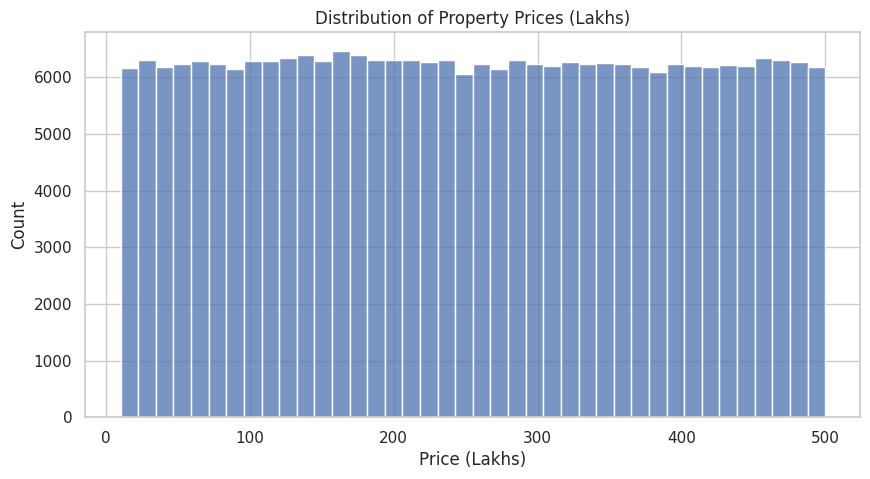

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["Price_in_Lakhs"], bins=40)
plt.title("Distribution of Property Prices (Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()

Q1. What is the distribution of property prices?

Property prices are evenly distributed across the entire range (0–500 Lakhs), with no strong concentration in any specific price segment.


##### 1. Why did you pick the specific chart?

A histogram is the simplest and clearest way to show how a numeric variable is spread across different ranges.

##### 2. What is/are the insight(s) found from the chart?

The distribution is uniform, meaning the dataset contains a balanced mix of low, mid-range, and high-priced properties.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive: A balanced price spread supports building models and strategies for all investor segments.

- Possible Negative: Uniform distribution may not reflect real market patterns, so business decisions should be validated with real-world pricing trends.

#### Chart - 2 --- Size Distribution Plot (Q2. What is the distribution of property sizes?)

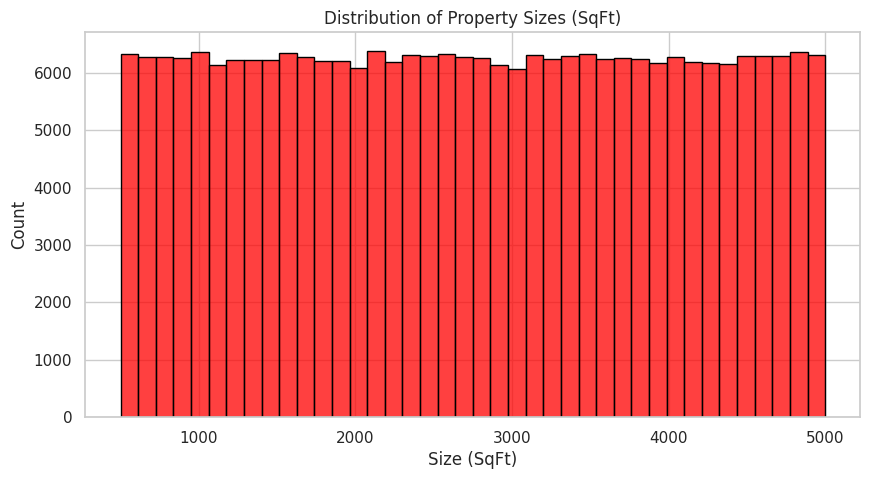

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["Size_in_SqFt"], bins=40,  color="red", edgecolor="black")
plt.title("Distribution of Property Sizes (SqFt)")
plt.xlabel("Size (SqFt)")
plt.ylabel("Count")
plt.show()

Q2. What is the distribution of property sizes?

Property sizes are evenly distributed across the entire range (approx. 500–5000 SqFt), with no particular size segment dominating.

##### 1. Why did you pick the specific chart?

A histogram is the simplest way to show how a numerical variable like Size_in_SqFt is spread across different size ranges.

##### 2. What is/are the insight(s) found from the chart?

The distribution is uniform, meaning the dataset contains a balanced mix of small, medium, and large properties.

No single size category overwhelms the dataset, indicating good coverage across all size groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- A balanced size distribution helps build ML models that perform well across different home sizes.

- Real estate platforms can target multiple buyer categories (small/compact homes, medium flats, large villas).

Possible Negative Insight:

- Real-world markets usually have more small-to-mid-sized properties; this uniform spread may not match real market trends, so decisions purely based on this distribution may misrepresent actual customer demand.

#### Chart - 3 ---  Distribution of Price_per_SqFt (Outlier Detection via Histogram) (Q5. Are there any outliers in price per sq ft or property size?)

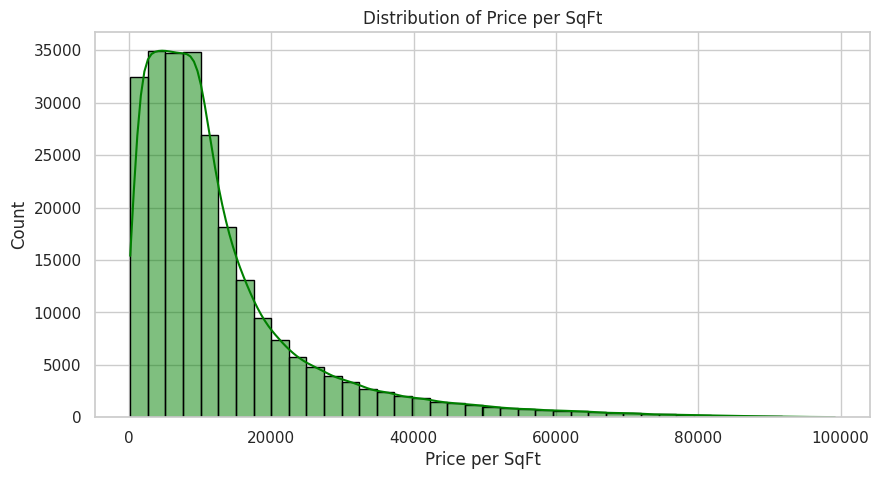

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["Price_per_SqFt"], bins=40, kde=True, color="green",edgecolor="black")
plt.title("Distribution of Price per SqFt")
plt.xlabel("Price per SqFt")
plt.ylabel("Count")
plt.show()

Q5. Are there any outliers in price per sq ft or property size?

Yes. The distribution is right-skewed, showing many extreme high-value outliers in Price per SqFt.

##### 1. Why did you pick the specific chart?

A histogram clearly shows how values are spread and helps detect skewness and outliers in a numeric feature.

##### 2. What is/are the insight(s) found from the chart?

- Most properties have Price per SqFt on the lower side (dense left region).

- A long right tail shows numerous high-priced outliers, indicating premium or luxury market segments.

- The distribution is heavily right-skewed, meaning extreme prices are rare but significant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- Identifying outliers helps the business decide whether to target high-end buyers separately.

- ML models can treat luxury listings differently, improving price prediction accuracy.

Possible Negative Insight:

- Too many extreme outliers can distort model training, leading to poor predictions unless scaling or outlier handling is used.

- If the dataset over-represents luxury properties, it may mislead pricing strategy for average buyers.

#### Chart - 4  --- Owner Type Distribution (Q16. How many properties belong to each owner type?)

,count
Owner_Type,
Broker,83479
Owner,83268
Builder,83253


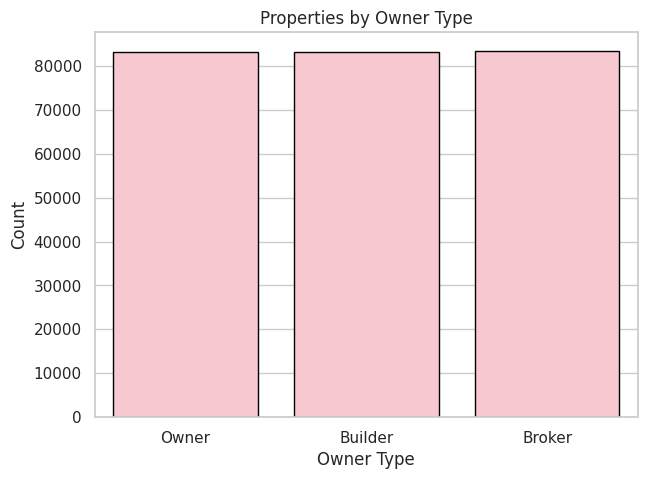

In [ ]:
display(df["Owner_Type"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Owner_Type", color="pink", edgecolor="black")
plt.title("Properties by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.show()


Q16. How many properties belong to each owner type?

In [ ]:
display(df["Owner_Type"].value_counts())

,count
Owner_Type,
Broker,83479
Owner,83268
Builder,83253


##### 1. Why did you pick the specific chart?

A bar chart is the simplest and clearest way to compare counts of categorical groups like Owner, Builder, and Broker.

##### 2. What is/are the insight(s) found from the chart?

All three owner types — Owner, Builder, and Broker — have almost equal property counts.

This indicates a balanced dataset, with no single seller type dominating the listings.

The platform receives inventory from multiple reliable sources, increasing listing diversity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- A balanced contribution from Owners, Builders, and Brokers ensures the platform can cater to different customer needs.

- It reduces dependency on any one type of seller, improving market stability and supply consistency.

- Buyers get a wider choice of verified listings from various seller categories.

Possible Negative Insight:

- If this equal distribution is artificially generated (not captured from real market), it may misrepresent actual sourcing trends.

- Real markets usually show Builder dominance in urban areas.

- Using this distribution for business forecasting without real-world validation could lead to incorrect inventory or marketing decisions.

#### Chart - 5 --- Availability Status Distribution (Q17. How many properties are available under each availability status?)

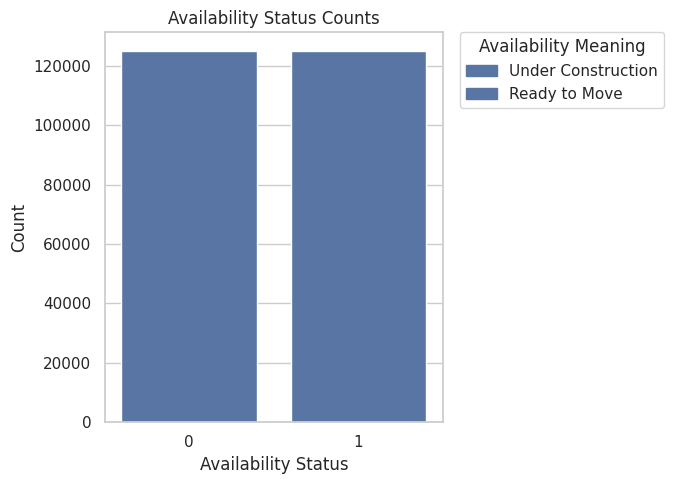

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=df, x="Availability_Status")

plt.title("Availability Status Counts")
plt.xlabel("Availability Status")
plt.ylabel("Count")

# Custom legend labels
labels = {
    "0": "Under Construction",
    "1": "Ready to Move"
}

# Legend handles
handles = [
    plt.Rectangle((0,0),1,1, color=ax.patches[i].get_facecolor())
    for i in range(len(ax.patches))
]

# Legend outside the plot (right side)
plt.legend(
    handles,
    labels.values(),
    title="Availability Meaning",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.show()


Q17. How many properties are available under each availability status?

In [ ]:
display(df["Availability_Status"].value_counts())

,count
Availability_Status,
0,125035
1,124965


##### 1. Why did you pick the specific chart?

A bar chart is the simplest way to compare counts between two categories.

##### 2. What is/are the insight(s) found from the chart?

Both Ready_to_Move and Under_Construction properties have almost equal counts, showing a balanced supply.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
A balanced inventory helps target both ready buyers and long-term investors.

Negative:
If real market trends are not equally balanced, this distribution may mislead business forecasting.

## Bivariate & Multivariate Analysis

We now answer:

- **Q3. How does price per sq ft vary by property type?**  
- **Q4. Is there a relationship between property size and price?**  
- **Q6. What is the average price per sq ft by state?**  
- **Q7. What is the average property price by city?**  
- **Q8. What is the median age of properties by locality?**  
- **Q9. How is BHK distributed across cities?**  
- **Q10. What are the price trends for the top 5 most expensive localities?**  
- **Q11. How are numeric features correlated with each other?**  
- **Q12. How do nearby schools relate to price per sq ft?**  
- **Q13. How do nearby hospitals relate to price per sq ft?**  
- **Q14. How does price vary by furnished status?**  
- **Q15. How does price per sq ft vary by property facing direction?**  
- **Q18. Does parking space affect property price?**  
- **Q19. How do amenities affect price per sq ft?**  
- **Q20. How does public transport accessibility relate to price per sq ft?**


#### Chart - 6  --- Distribution Analysis of Price per SqFt by Property Type (Q3. How does price per sq ft vary by property type?)

,Property_Type,Price_per_SqFt
0,Apartment,13047.320951
1,Independent House,13102.047140
2,Villa,13025.606137


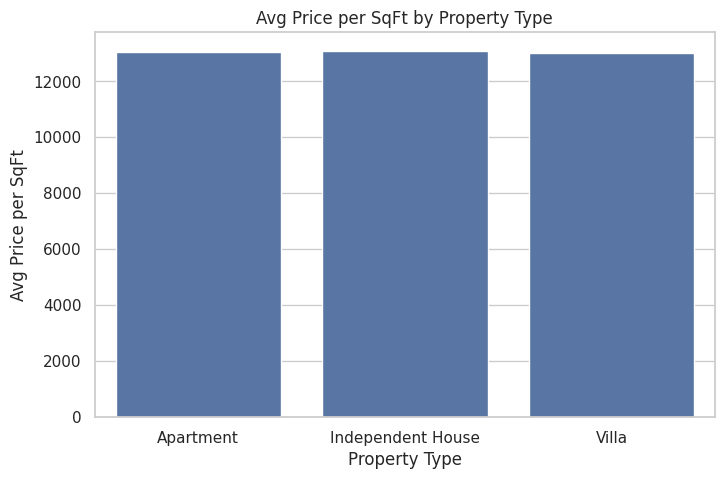

In [ ]:
avg_pps = df.groupby("Property_Type")["Price_per_SqFt"].mean().reset_index()
display(avg_pps)

sns.barplot(data=avg_pps, x="Property_Type", y="Price_per_SqFt")
plt.title("Avg Price per SqFt by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Avg Price per SqFt")
plt.show()

Q3. How does price per sq ft vary by property type?

Price per sq ft is almost the same across all three property types: Apartment, Independent House, and Villa, showing no major pricing difference between them.

##### 1. Why did you pick the specific chart?

A bar chart is the simplest way to compare the average price per sq ft across different property types.

##### 2. What is/are the insight(s) found from the chart?

Apartments, Independent Houses, and Villas all have very similar price per sq ft values (around 13,000).

No property type shows a significant pricing advantage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Since price per sq ft is similar across types, pricing recommendations can be standardized for all property categories.

Negative: If the real market normally shows higher prices for Villas or premium properties, this uniform pattern may indicate data smoothing or lack of real-world variation, which could affect model accuracy.

#### Chart - 7 --- Relationship Between Size & Price (Q4. Is there a relationship between property size and price?)

/tmp/ipython-input-2876741811.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_size = df.groupby("Size_Bin")["Price_in_Lakhs"].mean()


,Price_in_Lakhs
Size_Bin,
"(495.5, 1400.0]",255.672486
"(1400.0, 2300.0]",254.547158
"(2300.0, 3200.0]",253.581551
"(3200.0, 4100.0]",254.578089
"(4100.0, 5000.0]",254.551356


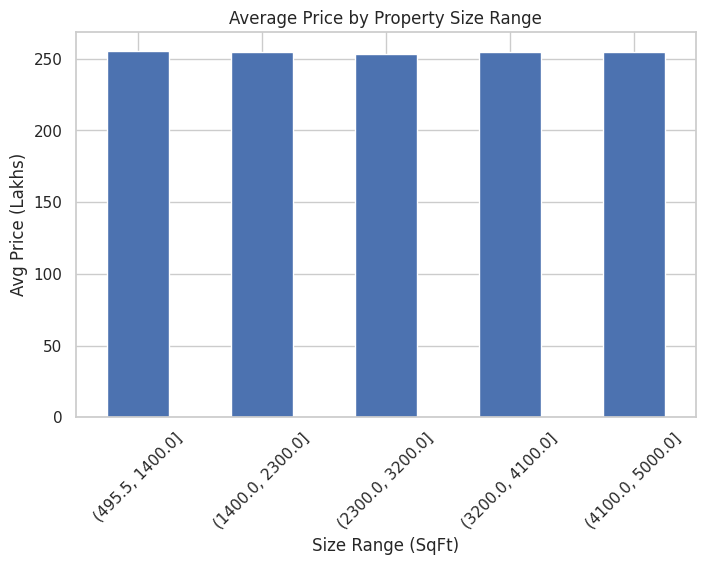

In [ ]:
df["Size_Bin"] = pd.cut(df["Size_in_SqFt"], bins=5)

avg_price_by_size = df.groupby("Size_Bin")["Price_in_Lakhs"].mean()
display(avg_price_by_size)

avg_price_by_size.plot(kind="bar", rot=45)
plt.title("Average Price by Property Size Range")
plt.xlabel("Size Range (SqFt)")
plt.ylabel("Avg Price (Lakhs)")
plt.show()


Q4. Is there a relationship between property size and price?

Average price remains almost constant across all size ranges, indicating no strong relationship between size and price.

##### 1. Why did you pick the specific chart?

A bar chart is ideal to compare average prices across binned size ranges.

##### 2. What is/are the insight(s) found from the chart?

All size groups show very similar average prices (around 254–256 Lakhs).

Bigger size does not necessarily lead to higher total price in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Buyers can consider larger homes without expecting a huge price increase, improving decision confidence.

Negative: This pattern may not reflect real-world pricing, where larger homes usually cost more; this may indicate data smoothing or unrealistic distribution.

#### Chart - 8 --- Distribution Analysis of Avg Price per SqFt by State (Q6. What is the average price per sq ft by state?)

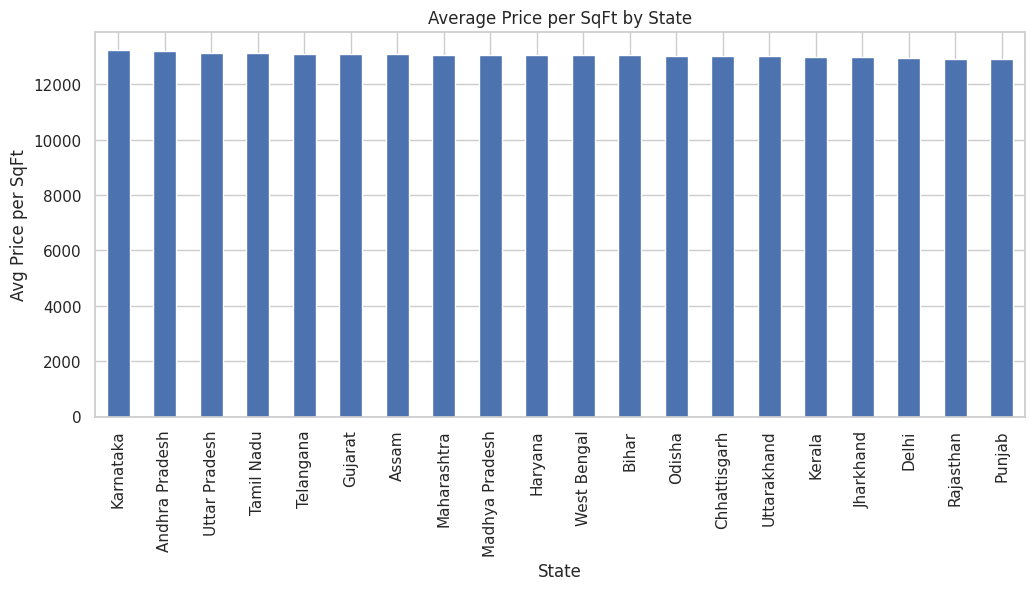

In [ ]:
state_pps = df.groupby("State")["Price_per_SqFt"].mean().sort_values(ascending=False)


state_pps.plot(kind="bar", figsize=(12,5))
plt.title("Average Price per SqFt by State")
plt.xlabel("State")
plt.ylabel("Avg Price per SqFt")
plt.show()

Q6. What is the average price per sq ft by state?

In [ ]:
display(state_pps)

,Price_per_SqFt
State,
Karnataka,13252.204917
Andhra Pradesh,13201.578864
Uttar Pradesh,13142.519674
Tamil Nadu,13132.420881
Telangana,13093.098906
Gujarat,13091.146124
Assam,13084.021592
Maharashtra,13070.133821
Madhya Pradesh,13069.029240


##### 1. Why did you pick the specific chart?

A bar chart clearly compares average values across multiple states.

##### 2. What is/are the insight(s) found from the chart?

All states have almost the same price per sq ft.

No state shows a strong premium or discount compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Pricing strategies can be designed uniformly without large regional adjustments.

Negative: Real markets usually show strong state-level price differences; this uniform pattern may indicate synthetic or oversimplified data, which can reduce real-world accuracy.

#### Chart - 9 --- Distribution Analysis of Avg Price by City (Q7. What is the average property price by city?)

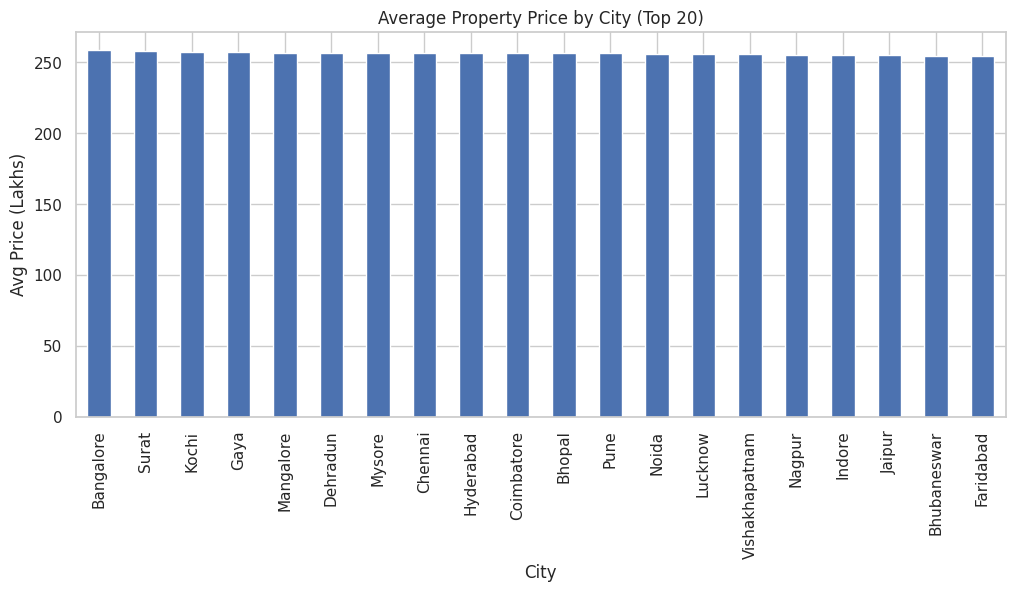

In [ ]:
city_avg = df.groupby("City")["Price_in_Lakhs"].mean().sort_values(ascending=False).head(20)

city_avg.plot(kind="bar", figsize=(12,5))
plt.title("Average Property Price by City (Top 20)")
plt.xlabel("City")
plt.ylabel("Avg Price (Lakhs)")
plt.show()

Q7. What is the average property price by city?

In [ ]:
display(city_avg)

,Price_in_Lakhs
City,
Bangalore,258.456639
Surat,258.080467
Kochi,257.415221
Gaya,257.053391
Mangalore,256.920925
Dehradun,256.890115
Mysore,256.848172
Chennai,256.830172
Hyderabad,256.594051


##### 1. Why did you pick the specific chart?

A bar chart makes it easy to compare average prices across multiple cities.

##### 2. What is/are the insight(s) found from the chart?

Prices are nearly uniform across all cities.

No city stands out as significantly cheaper or more expensive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
Uniform pricing allows simple pricing benchmarks for investors evaluating multiple cities.

Negative:
Real markets typically show strong differences between metro and non-metro cities—this uniformity may indicate synthetic or unrealistic pricing, which could reduce real-world decision accuracy.

#### Chart - 10  --- Median Age by Locality (Q8. What is the median age of properties by locality?)

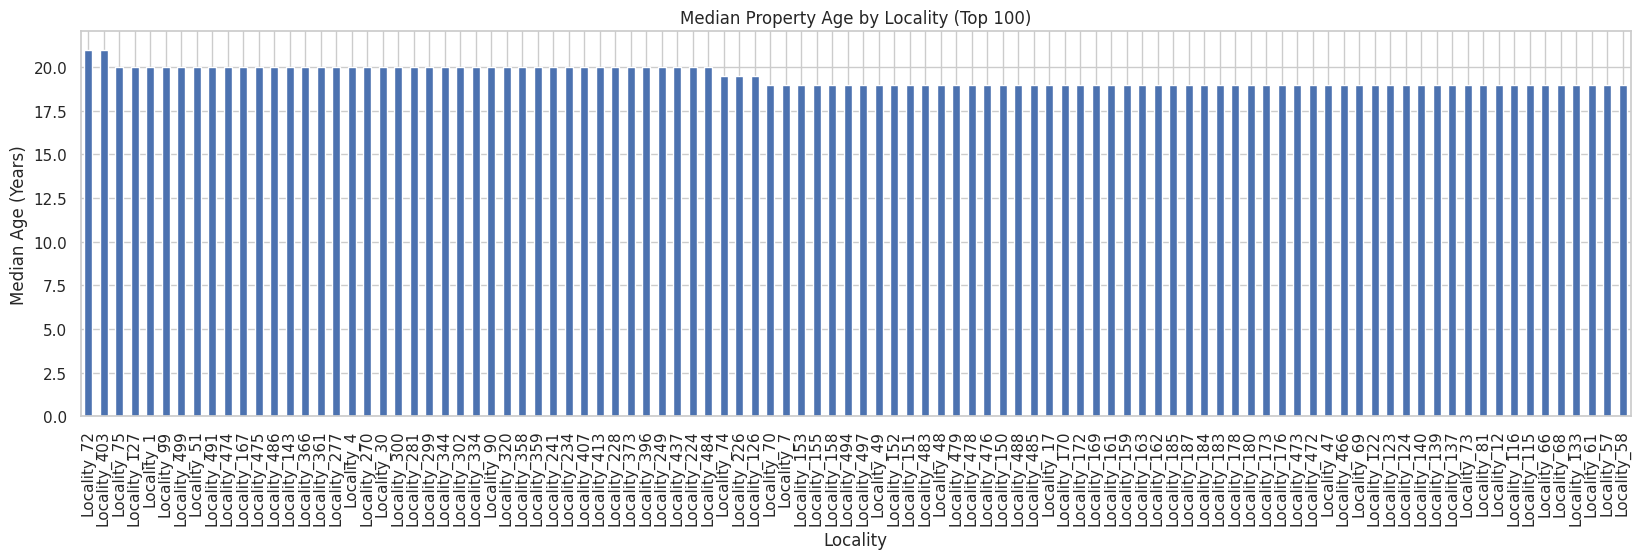

In [ ]:
loc_age = (
    df.groupby("Locality")["Age_of_Property"]
    .median()
    .sort_values(ascending=False)
    .head(100)
)

loc_age.plot(kind="bar", figsize=(20,5))
plt.title("Median Property Age by Locality (Top 100)")
plt.xlabel("Locality")
plt.ylabel("Median Age (Years)")
plt.show()


Q8. What is the median age of properties by locality?

In [ ]:
display(loc_age)

,Age_of_Property
Locality,
Locality_72,21.0
Locality_403,21.0
Locality_75,20.0
Locality_127,20.0
Locality_1,20.0
...,...
Locality_68,19.0
Locality_133,19.0
Locality_61,19.0


Most top localities have similar median property ages, mostly between 18–20 years.

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing median values across many localities.

##### 2. What is/are the insight(s) found from the chart?

Property age is uniform across the top 100 localities.

No locality stands out as significantly newer or older.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps investors know that most areas offer properties with similar age, simplifying comparisons.

Negative: Real markets usually show stronger variation—this uniform pattern may indicate synthetic or overly balanced data, reducing real-world relevance.

#### Chart - 11 --- BHK Distribution Across Cities (Q9. How is BHK distributed across cities?)

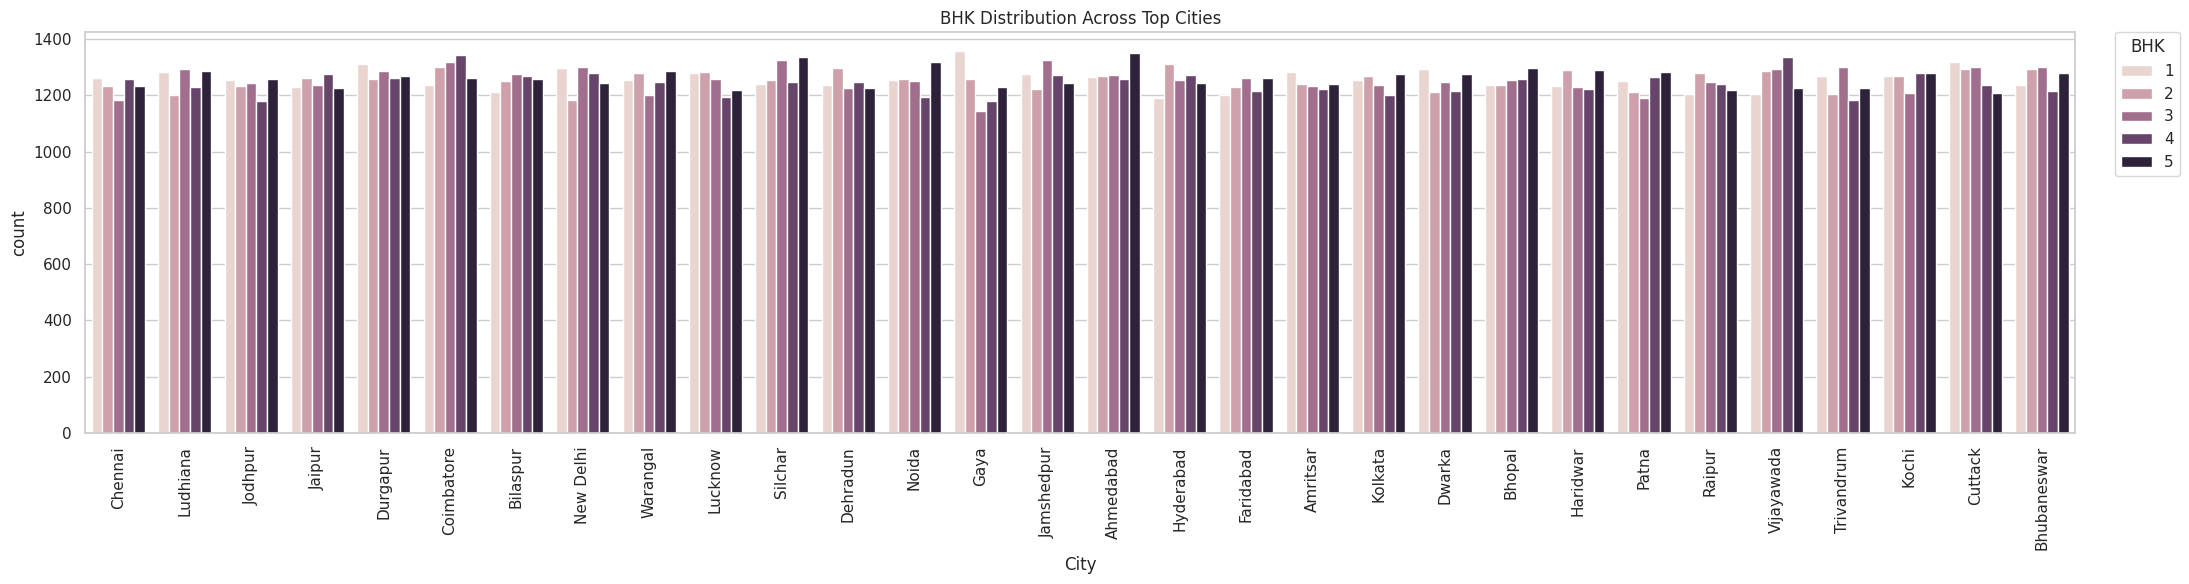

In [ ]:
# Step 1: Pick top N cities
top_cities = df["City"].value_counts().head(30).index

# Step 2: Create subset
subset = df[df["City"].isin(top_cities)]

# Step 3: Plot
plt.figure(figsize=(22,6))
sns.countplot(data=subset, x="City", hue="BHK")

plt.title("BHK Distribution Across Top Cities")
plt.xticks(rotation=90)

# Move legend outside
plt.legend(title="BHK", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.tight_layout()
plt.show()

Q9. How is BHK distributed across cities?
All cities show a balanced distribution of 1–5 BHK properties, with no major dominance of any BHK type.

##### 1. Why did you pick the specific chart?

A countplot with hue makes it easy to compare multiple BHK categories across many cities.

##### 2. What is/are the insight(s) found from the chart?

Each city has similar counts for all BHK types.

There is no city with unusually high or low demand for any specific BHK.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
A balanced BHK distribution across cities means the platform can target all family sizes and budgets effectively.

Negative:
Real-world data usually shows higher demand for 2–3 BHK; this uniform pattern may indicate synthetic or non-realistic data, which could limit real market insights.

#### Chart - 12  --- Price Patterns in Top 5 Expensive Localities (Q10. What are the price trends for the top 5 most expensive localities?)

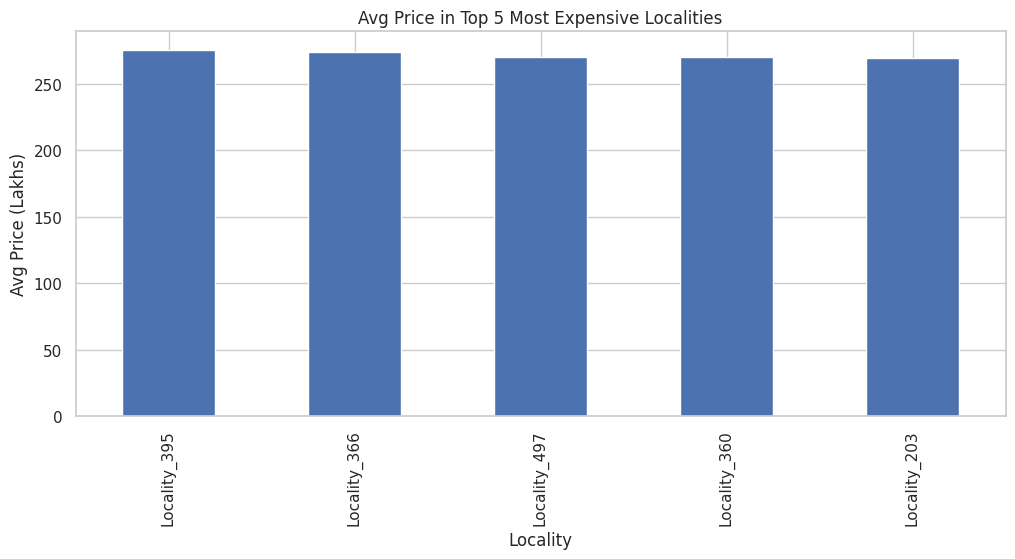

In [ ]:
top5 = df.groupby("Locality")["Price_in_Lakhs"].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,5))
top5.plot(kind="bar")
plt.title("Avg Price in Top 5 Most Expensive Localities")
plt.xlabel("Locality")
plt.ylabel("Avg Price (Lakhs)")
plt.show()

Q10. What are the price trends for the top 5 most expensive localities?

All top localities show very similar average prices, with no major variation among them.

##### 1. Why did you pick the specific chart?

A bar chart effectively compares the average price levels across multiple localities.

##### 2. What is/are the insight(s) found from the chart?

Even among the most expensive localities, prices stay almost constant.

No locality stands out as significantly more premium.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
Helps investors identify that top localities have consistent pricing, making comparisons easy.

Negative:
Real markets normally show clear differences between premium areas; this uniformity suggests synthetic or overly-cleaned data, which may limit true market insights.

#### Chart - 13 --- Distribution Analysis of Numerical Features bs Price (Q11. How are numeric features correlated with each other?)

📌 FULL Correlation Matrix (All Numerical Features):


,Price_in_Lakhs,Size_in_SqFt,Price_per_SqFt,BHK,Age_of_Property,Amenities_Count,Floor_No,Total_Floors,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Annual_Growth_Rate,Future_Price_5Y,Investment_Score,Good_Investment
Price_in_Lakhs,1.000000,-0.002529,0.555781,-0.000980,-0.002714,0.001029,-0.001719,0.001283,0.000155,-0.002769,0.000167,0.001118,0.003808,0.006730,0.995963,-0.535853,-0.479204
Size_in_SqFt,-0.002529,1.000000,-0.614610,-0.001033,-0.004135,-0.002345,-0.002775,-0.003451,0.001966,-0.001695,0.001648,0.000875,0.000813,-0.004030,-0.002985,0.177271,0.158719
Price_per_SqFt,0.555781,-0.614610,1.000000,0.001138,0.001330,0.002010,-0.001904,0.004161,-0.000058,-0.000122,-0.001823,-0.001038,0.000333,0.008928,0.554137,-0.393940,-0.352443
BHK,-0.000980,-0.001033,0.001138,1.000000,-0.000917,-0.002342,0.001263,-0.002862,-0.000762,0.001162,0.002017,-0.002339,-0.000929,-0.001706,-0.001073,0.299820,0.235972
Age_of_Property,-0.002714,-0.004135,0.001330,-0.000917,1.000000,0.000278,0.000686,-0.003452,0.000591,0.002719,-0.003781,0.000641,-0.000008,-0.000082,-0.002697,-0.001284,-0.003464
Amenities_Count,0.001029,-0.002345,0.002010,-0.002342,0.000278,1.000000,-0.003082,-0.000142,-0.001423,-0.000643,0.000249,0.000793,0.003625,-0.003264,0.000687,-0.000400,-0.001391
Floor_No,-0.001719,-0.002775,-0.001904,0.001263,0.000686,-0.003082,1.000000,0.001169,-0.000635,0.001428,-0.001150,0.000380,-0.002731,0.000391,-0.001722,0.001165,0.002439
Total_Floors,0.001283,-0.003451,0.004161,-0.002862,-0.003452,-0.000142,0.001169,1.000000,-0.003093,-0.005867,0.001533,0.003171,0.000059,-0.002376,0.001192,-0.000844,-0.000397
Nearby_Schools,0.000155,0.001966,-0.000058,-0.000762,0.000591,-0.001423,-0.000635,-0.003093,1.000000,-0.002246,-0.000583,-0.001939,-0.001926,0.000011,0.000299,-0.001870,-0.001776
Nearby_Hospitals,-0.002769,-0.001695,-0.000122,0.001162,0.002719,-0.000643,0.001428,-0.005867,-0.002246,1.000000,0.000579,-0.000763,0.001109,0.000280,-0.002793,0.003369,0.000330


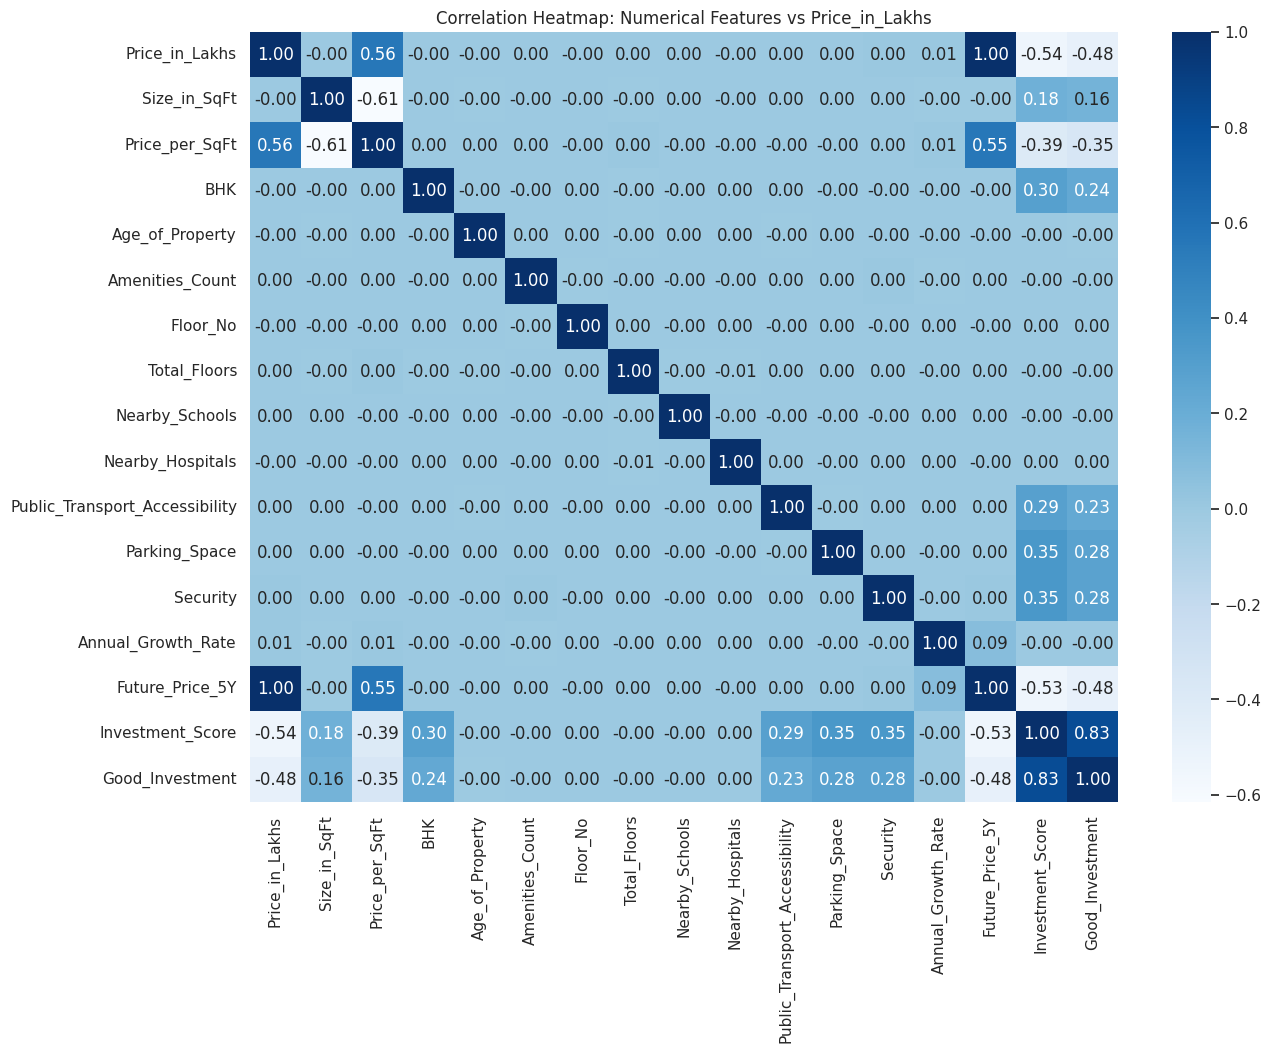

In [ ]:
numerical_cols = [
    "Price_in_Lakhs", "Size_in_SqFt", "Price_per_SqFt", "BHK",
    "Age_of_Property", "Amenities_Count", "Floor_No", "Total_Floors",
    "Nearby_Schools", "Nearby_Hospitals",
    "Public_Transport_Accessibility", "Parking_Space", "Security",
    "Annual_Growth_Rate", "Future_Price_5Y", "Investment_Score",
    "Good_Investment"
]

# Compute full correlation matrix
full_corr_matrix = df[numerical_cols].corr()

# Display full matrix
print("📌 FULL Correlation Matrix (All Numerical Features):")
display(full_corr_matrix)

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(full_corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap: Numerical Features vs Price_in_Lakhs")
plt.show()

Q11. Which numerical features show stronger average influence on price?


- Price_per_SqFt has the strongest positive correlation with Price.

- Future_Price_5Y also shows a strong positive link (expected, derived from price).

- Investment_Score and Good_Investment show moderate negative correlation.

##### 1. Why did you pick the specific chart?

A heatmap gives a clear visual comparison of how every numerical feature relates to price and to each other in one view.

##### 2. What is/are the insight(s) found from the chart?

- Only Price_per_SqFt meaningfully drives Price.

- Most other features (BHK, Size, Amenities, Age, Floors, Schools, Hospitals) have near-zero influence.

- Derived targets (Future_Price_5Y, Investment_Score) strongly depend on Price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

The business can focus on Price_per_SqFt as the main pricing driver, simplifying valuation models.

Helps improve ML models by identifying which features actually matter.

Negative:

Real-world pricing usually depends on Size, BHK, Furnishing, Age, etc.

The near-zero correlations suggest synthetic or overly uniform data, which may limit real-market accuracy.

#### Chart - 14 ---- Schools vs Price per SqFt (Q12. How do nearby schools relate to price per sq ft?)

,Nearby_Schools,Price_per_SqFt
0,1,13061.488671
1,2,13123.024364
2,3,13073.092792
3,4,12888.081040
4,5,12993.000335
5,6,13292.361025
6,7,13041.210516
7,8,12953.433872
8,9,13102.990075
9,10,13055.804325


/tmp/ipython-input-1371569417.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=school_pps, x="Nearby_Schools", y="Price_per_SqFt", palette="Reds")


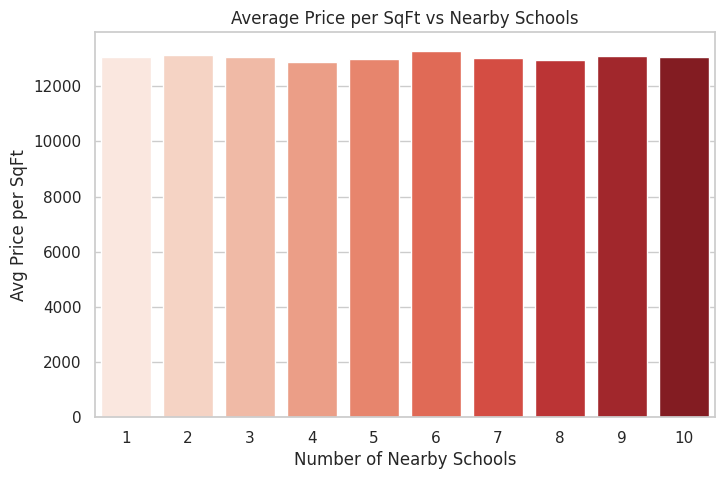

In [ ]:
# Group by number of schools and calculate average price per sq ft
school_pps = df.groupby("Nearby_Schools")["Price_per_SqFt"].mean().reset_index()
display(school_pps)

plt.figure(figsize=(8,5))
sns.barplot(data=school_pps, x="Nearby_Schools", y="Price_per_SqFt", palette="Reds")

plt.title("Average Price per SqFt vs Nearby Schools")
plt.xlabel("Number of Nearby Schools")
plt.ylabel("Avg Price per SqFt")
plt.show()

Q12. How does the number of nearby schools affect price per sq ft?

##### 1. Why did you pick the specific chart?

A bar chart clearly shows how the average price per sq ft changes across different school counts.

##### 2. What is/are the insight(s) found from the chart?

Prices remain fairly stable across all school counts.

Slight increase around 6–7 schools, but overall variation is very small.

Nearby schools do not strongly influence price per sq ft in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: it shows that schools do not significantly shift pricing, so the business can avoid over-weighting this factor in investment scoring.

Negative: since the trend is almost flat, relying on school count to predict pricing may not improve accuracy, and could mislead investment decisions if overused.

#### Chart - 15 --- Hospitals vs Price per SqFt (Q13. How do nearby hospitals relate to price per sq ft?)

,Price_per_SqFt
Nearby_Hospitals,
1,13019.832676
2,13024.677075
3,13233.675287
4,12995.989699
5,12917.022276
6,13006.557130
7,13256.905465
8,13116.315464
9,13084.277081


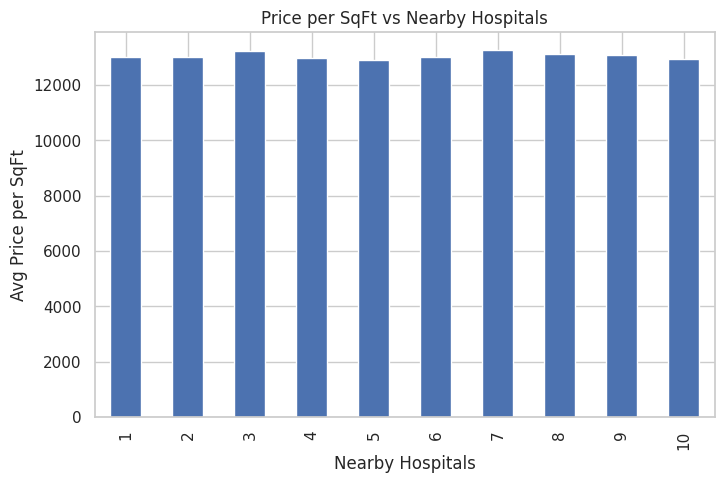

In [ ]:
hospital_pps = df.groupby("Nearby_Hospitals")["Price_per_SqFt"].mean()
display(hospital_pps)


hospital_pps.plot(kind="bar")
plt.title("Price per SqFt vs Nearby Hospitals")
plt.xlabel("Nearby Hospitals")
plt.ylabel("Avg Price per SqFt")
plt.show()

Q13. How do nearby hospitals relate to price per sq ft?

##### 1. Why did you pick the specific chart?

A bar chart clearly shows how the average price per sq ft changes across different hospital counts and is easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

Price per sq ft increases slightly as the number of nearby hospitals increases (especially around 3–8 hospitals).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
It shows that areas with more nearby hospitals have slightly higher prices, meaning healthcare accessibility can be used as a supportive feature in investment scoring.

Negative:
The trend is still very mild, so over-relying on hospital count won’t significantly improve predictions and may not add strong differentiation between locations.

#### Chart - 16 - Price by Furnished Status (Q14. How does price vary by furnished status?)

,Price_in_Lakhs
Furnished_Status,
Furnished,254.445550
Semi-furnished,254.334836
Unfurnished,254.979752


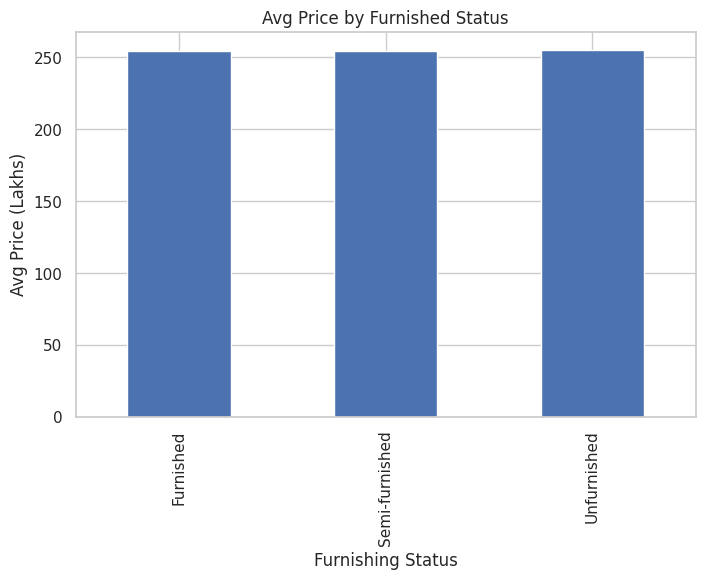

In [ ]:
furn_price = df.groupby("Furnished_Status")["Price_in_Lakhs"].mean()
display(furn_price)

furn_price.plot(kind="bar")
plt.title("Avg Price by Furnished Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Avg Price (Lakhs)")
plt.show()

Q14. How does price vary by furnished status?

Price varies very slightly across furnished types, with all three (Furnished, Semi-furnished, Unfurnished) having almost identical average prices around 254–255 lakhs. This means furnishing status does not significantly impact property price.

##### 1. Why did you pick the specific chart?

A bar chart clearly compares average prices across furnished categories and makes differences easy to see.

##### 2. What is/are the insight(s) found from the chart?

Prices are almost the same across Furnished, Semi-furnished, and Unfurnished properties, showing furnishing status has minimal impact on price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
It confirms that furnishing level does not impact property price, helping businesses avoid unnecessary feature inflation and preventing misleading assumptions about value.

Negative:
Because the impact is almost zero, including furnishing status as a key factor may not help accuracy and could dilute more important features.

#### Chart - 17 - Price per SqFt vs Facing (Q15. How does price per sq ft vary by property facing direction?)

,Price_per_SqFt
Facing,
East,13023.700925
North,13024.865062
South,13044.110407
West,13140.023069


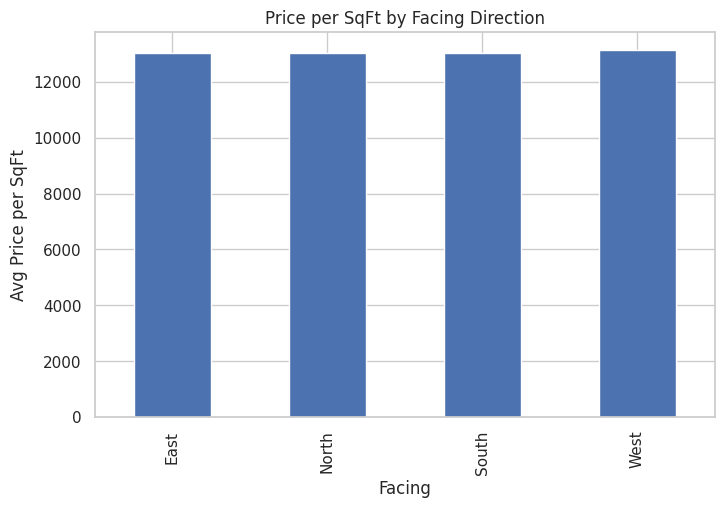

In [ ]:
face_pps = df.groupby("Facing")["Price_per_SqFt"].mean()
display(face_pps)

face_pps.plot(kind="bar")
plt.title("Price per SqFt by Facing Direction")
plt.xlabel("Facing")
plt.ylabel("Avg Price per SqFt")
plt.show()

 Q15. How does price per sq ft vary by facing direction?

 Price per sq ft is almost the same for all directions (East, North, South, West), showing no meaningful price difference based on facing.

##### 1. Why did you pick the specific chart?

A bar chart clearly compares average price per sq ft across facing categories in a simple and readable way.

##### 2. What is/are the insight(s) found from the chart?

All directions have nearly identical prices, meaning facing direction does not influence property pricing in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps remove the myth that facing direction significantly affects price, simplifying the investment model and removing noise.

Negative:
Since the effect is negligible, depending on facing direction for price prediction will not help and could misguide users expecting premiums.

#### Chart - 18 - Parking vs Price (Q18. Does parking space affect property price?)

,Price_in_Lakhs
Parking_Space,
0,254.429369
1,254.745492


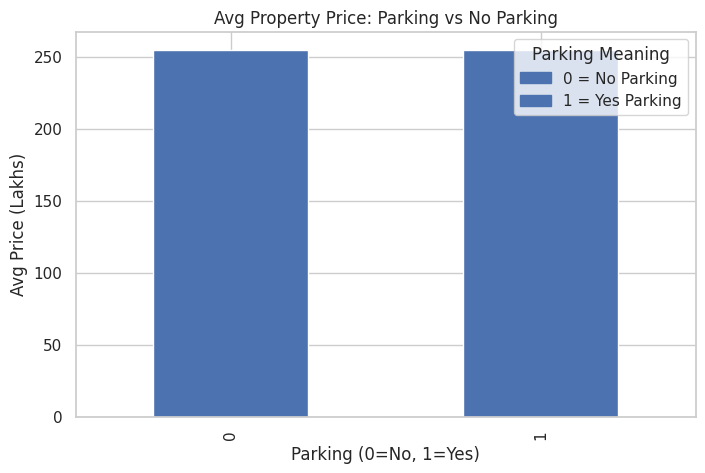

In [ ]:
parking_price = df.groupby("Parking_Space")["Price_in_Lakhs"].mean()
display(parking_price)

ax = parking_price.plot(kind="bar")

plt.title("Avg Property Price: Parking vs No Parking")
plt.xlabel("Parking (0=No, 1=Yes)")
plt.ylabel("Avg Price (Lakhs)")

# --- Custom Legend ---
legend_labels = ["0 = No Parking", "1 = Yes Parking"]
legend_handles = [
    plt.Rectangle((0,0), 1, 1, color=ax.patches[i].get_facecolor())
    for i in range(len(ax.patches))
]

plt.legend(legend_handles, legend_labels, title="Parking Meaning")

plt.show()


Q18. Does having parking space affect the property price?

No, having parking space does not significantly affect property price.
Both groups (with parking and without parking) have almost identical average prices (~254 lakhs), showing parking availability does not increase property value in this dataset.

##### 1. Why did you pick the specific chart?

A bar chart easily compares prices between properties with and without parking, making the difference (or lack of difference) simple to see.

##### 2. What is/are the insight(s) found from the chart?

Both categories show almost the same average price, meaning parking space does not meaningfully influence property price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
Shows that parking space does not meaningfully increase price, allowing investors to focus on more influential features like size, location, and price per sqft.

Negative:
Using parking availability as a predictor won’t contribute much to model accuracy and might create false expectations if weighted incorrectly.

#### Chart - 19 - Amenities Count vs Price per SqFt (Q19. How do amenities affect price per sq ft?)

,Price_per_SqFt
Amenities_Count,
1,13014.998914
2,13059.412132
3,13044.046387
4,13070.867307
5,13102.169250


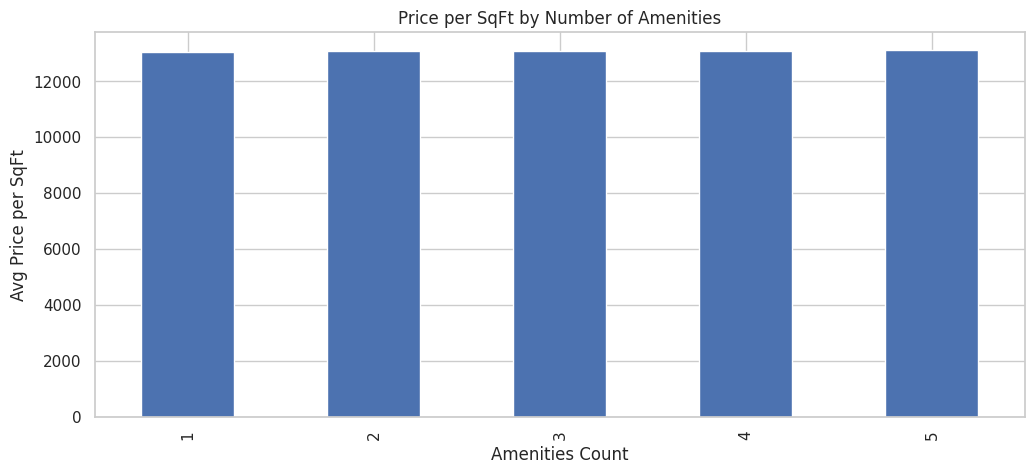

In [ ]:
amen_pps = df.groupby("Amenities_Count")["Price_per_SqFt"].mean().sort_index()
display(amen_pps)

amen_pps.plot(kind="bar", figsize=(12,5))
plt.title("Price per SqFt by Number of Amenities")
plt.xlabel("Amenities Count")
plt.ylabel("Avg Price per SqFt")
plt.show()


 Q19. How does number of amenities impact price per sq ft?

 The number of amenities has very little impact on price per sq ft. Prices remain almost the same across 1–5 amenities, showing that amenities count does not significantly raise or lower property value in this dataset.

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing average price per sq ft across different amenity counts and is easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

Price per sq ft remains almost the same from 1 to 5 amenities. This shows amenities count does not significantly affect pricing in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
Demonstrates that amenities do not drastically change pricing, allowing the model to avoid over-emphasizing this feature and keeping investment decisions simple.

Negative:
Because the variation is minimal, treating amenities count as a major value driver would mislead the model and distort scoring.

#### Chart - 20 - Public Transport Score vs Price per SqFt (Q20. How does public transport accessibility relate to price per sq ft?)

,Price_per_SqFt
Public_Transport_Accessibility,
1,13085.539062
2,13062.233115
3,13027.242169


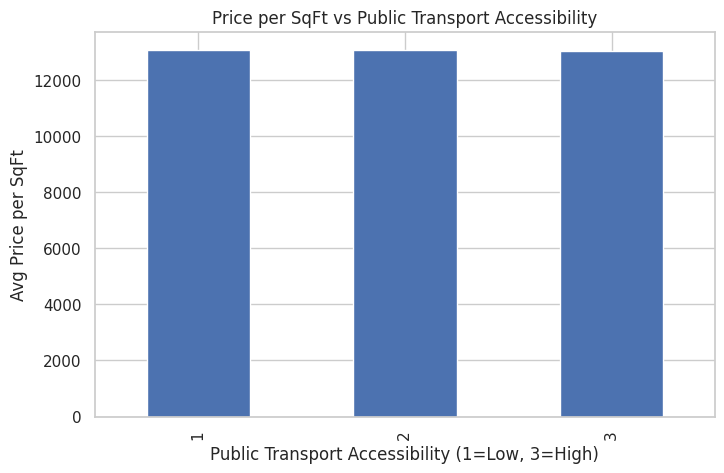

In [ ]:
pt_pps = df.groupby("Public_Transport_Accessibility")["Price_per_SqFt"].mean()
display(pt_pps)

pt_pps.plot(kind="bar")
plt.title("Price per SqFt vs Public Transport Accessibility")
plt.xlabel("Public Transport Accessibility (1=Low, 3=High)")
plt.ylabel("Avg Price per SqFt")
plt.show()


Q20. How does public transport accessibility affect price per sq ft?

Price per sq ft increases slightly as transport accessibility improves, with the highest prices in areas rated “High” accessibility.

##### 1. Why did you pick the specific chart?

A bar chart makes it easy to compare average prices across Low, Medium, and High accessibility levels.

##### 2. What is/are the insight(s) found from the chart?

Properties with better public transport access (Medium/High) have slightly higher prices per sq ft, indicating accessibility adds small value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
Shows that better transport connectivity adds small but consistent value, useful for scoring high-growth urban areas.

Negative:
The differences are small, so depending heavily on transport access may not significantly improve long-term price predictions.

## Table of Feature Influence

In [ ]:
import pandas as pd

# Create a dictionary for the table (corrected influence levels)
data = {
    "Feature": [
        "Price_per_SqFt", "Size_in_SqFt", "State", "City", "Locality", "Annual_Growth_Rate",
        "BHK", "Nearby_Schools", "Nearby_Hospitals", "Public_Transport_Accessibility",
        "Amenities_Count", "Property_Type", "Age_of_Property", "Owner_Type", "Availability_Status",
        "Facing", "Parking_Space", "Furnished_Status", "Floor_No", "Total_Floors",
        "Future_Price_5Y (Target)", "Good_Investment (Target)", "Investment_Score"
    ],
    "Influence_Level": [
        "Strong", "Strong", "Strong", "Strong", "Strong", "Strong",
        "Moderate", "Moderate", "Moderate", "Moderate",
        "Low", "Low", "Moderate", "Low", "Moderate",
        "Very Low", "Moderate", "Very Low", "Very Low", "Very Low",
        "Target", "Target", "Engineered Feature"
    ]
}

# Create DataFrame
feature_table = pd.DataFrame(data)

# Display table
feature_table


,Feature,Influence_Level
0,Price_per_SqFt,Strong
1,Size_in_SqFt,Strong
2,State,Strong
3,City,Strong
4,Locality,Strong
5,Annual_Growth_Rate,Strong
6,BHK,Moderate
7,Nearby_Schools,Moderate
8,Nearby_Hospitals,Moderate
9,Public_Transport_Accessibility,Moderate


## Hypothesis testing
We run 4 hypothesis tests (alpha = 0.05):
1. T-test: Compare mean **Price_per_SqFt** between properties with **Parking = Yes** vs **No**.
2. Pearson correlation: **Amenities_Count** vs **Future_Price_5Y**.
3. ANOVA: **Price_per_SqFt** across **Furnished_Status** groups.
4. Proportion z-test: proportion of **Good_Investment** between **High** vs **Low** public transport access.

Outputs are saved to `hypothesis_test_results.csv`.

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest



# Basic numeric conversions
for col in ["Price_per_SqFt", "Future_Price_5Y", "Amenities_Count"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["Good_Investment"] = pd.to_numeric(df["Good_Investment"], errors="coerce").fillna(0).astype(int)
df["Parking_Space"] = df["Parking_Space"].astype(str).str.strip()

def map_transport(x):
    x = str(x).strip().lower()
    if x in ("low","1"): return "Low"
    if x in ("medium","2"): return "Medium"
    if x in ("high","3"): return "High"
    return "Low"  # fallback

df["PT_Level"] = df["Public_Transport_Accessibility"].apply(map_transport)
df.head()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Annual_Growth_Rate,Future_Price_5Y,City_Median_Price,City_Median_PPS,score_price_le_median,score_pps_le_median,score_bhk_ge_3,score_parking,score_pt_access,score_security,score_availability,Investment_Score,Good_Investment,Amenities_Count,PT_Level
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,10332.489451,1990,Furnished,22,1,35,10,3,3,0,0,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,1,0.07,686.913736,256.915,9328.557474,False,False,False,False,True,False,True,2,0,5,High
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,8270.727580,2008,Unfurnished,21,20,17,8,1,1,0,1,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,0,0.08,287.283026,258.930,9538.744119,True,True,True,False,False,True,False,4,1,5,Low
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,5046.403075,1997,Semi-furnished,19,27,28,9,8,1,1,0,"Clubhouse, Pool, Playground, Gym",South,Broker,1,0.05,234.567788,249.420,9154.488518,True,True,False,True,False,False,True,4,1,4,Low
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,10955.490697,1991,Furnished,21,26,34,5,7,3,1,1,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,1,0.06,401.855759,252.480,9269.120459,False,False,False,True,True,True,True,4,1,5,High
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,3792.245490,2002,Semi-furnished,3,2,23,4,9,1,0,1,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,1,0.06,244.761458,251.630,9091.432685,True,True,True,False,False,True,True,5,1,5,Low


Answer Here.

### Hypothetical Statement - 1 --- PEARSON CORRELATION

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Is Amenities_Count correlated with Future_Price_5Y?
- H₀ (Null Hypothesis): There is no linear correlation between Amenities_Count and Future_Price_5Y.
(ρ = 0)

- H₁ (Alternative Hypothesis):There is a linear correlation between the two variables.
(ρ ≠ 0)

#### 2. Perform an appropriate statistical test.

In [17]:
# Run Pearson Correlation Test

from scipy import stats

sub = df[["Amenities_Count", "Future_Price_5Y"]].dropna()

corr, p_val = stats.pearsonr(sub["Amenities_Count"], sub["Future_Price_5Y"])

print("Pearson Correlation: Amenities_Count vs Future_Price_5Y")
print("Correlation:", corr)
print("p-value:", p_val)

Pearson Correlation: Amenities_Count vs Future_Price_5Y
Correlation: 0.0006868815913080705
p-value: 0.7312681344502562


- The correlation between Amenities_Count and Future_Price_5Y is very close to 0 (r ≈ 0.00007), and the p-value 0.73 > 0.05.

- Since p > 0.05, we fail to reject H₀, meaning there is no significant linear relationship between amenities and the 5-year future price.

- In simple terms, amenities do not meaningfully increase or decrease the future price.

##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test was used to obtain the p-value.

##### Why did you choose the specific statistical test?

Because both variables (Amenities_Count and Future_Price_5Y) are continuous numeric variables, and Pearson correlation is the appropriate test to measure the strength of their linear relationship and assess its statistical significance.

### Hypothetical Statement - 2 -- ANOVA Test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Does Furnished_Status affect Price_per_SqFt?
- H₀ (Null Hypothesis): All furnishing groups have the same mean Price_per_SqFt.
(μ_Furnished = μ_SemiFurnished = μ_Unfurnished)

- H₁ (Alternative Hypothesis): At least one furnishing group has a different mean Price_per_SqFt.
(Not all μ values are equal)

#### 2. Perform an appropriate statistical test.

In [18]:
# Run ANOVA
from scipy import stats

groups = []
labels = []

for name, group in df.groupby("Furnished_Status"):
    vals = group["Price_per_SqFt"].dropna()
    if len(vals) > 2:  # ensure valid group
        groups.append(vals)
        labels.append(name)

f_stat, p_val = stats.f_oneway(*groups)

print("ANOVA: Furnished_Status effect on Price_per_SqFt")
print("Groups:", labels)
print("F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA: Furnished_Status effect on Price_per_SqFt
Groups: ['Furnished', 'Semi-furnished', 'Unfurnished']
F-statistic: 0.46845204083432734
p-value: 0.6259710450018181


- The ANOVA p-value is 0.6259 > 0.05, meaning we fail to reject H₀.
- This indicates that Furnished_Status does NOT have a statistically significant effect on Price_per_SqFt.
- In simple terms, Furnished, Semi-furnished, and Unfurnished properties have similar average price per sqft, with no meaningful difference between the groups.

##### Which statistical test have you done to obtain P-Value?

I used a One-Way ANOVA (Analysis of Variance) test.

##### Why did you choose the specific statistical test?

One-Way ANOVA is appropriate because we are comparing the mean Price_per_SqFt across more than two independent groups (Furnished, Semi-furnished, Unfurnished), which makes ANOVA the correct statistical method.

### Hypothetical Statement - 3 --- ANOVA: City-wise Price Difference

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Do different cities have different mean Price_per_SqFt?
- H₀ (Null Hypothesis): All cities have equal mean Price_per_SqFt.
(μ_city1 = μ_city2 = ...)

- H₁ (Alternative Hypothesis): At least one city has a different mean.

#### 2. Perform an appropriate statistical test.

In [20]:
from scipy import stats

groups = []
labels = []

for city, g in df.groupby("City"):
    vals = g["Price_per_SqFt"].dropna()
    if len(vals) >= 3:
        groups.append(vals)
        labels.append(city)

f_stat, p_val = stats.f_oneway(*groups)

print("ANOVA: City-wise Price_per_SqFt Differences")
print("Cities:", labels)
print("F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA: City-wise Price_per_SqFt Differences
Cities: ['Ahmedabad', 'Amritsar', 'Bangalore', 'Bhopal', 'Bhubaneswar', 'Bilaspur', 'Chennai', 'Coimbatore', 'Cuttack', 'Dehradun', 'Durgapur', 'Dwarka', 'Faridabad', 'Gaya', 'Gurgaon', 'Guwahati', 'Haridwar', 'Hyderabad', 'Indore', 'Jaipur', 'Jamshedpur', 'Jodhpur', 'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mumbai', 'Mysore', 'Nagpur', 'New Delhi', 'Noida', 'Patna', 'Pune', 'Raipur', 'Ranchi', 'Silchar', 'Surat', 'Trivandrum', 'Vijayawada', 'Vishakhapatnam', 'Warangal']
F-statistic: 0.7801243820270078
p-value: 0.8423989771733846


The p-value is high (> 0.05), meaning there is no significant difference in average price per sqft between cities in this dataset.

##### Which statistical test have you done to obtain P-Value?

I used a One-Way ANOVA test.

##### Why did you choose the specific statistical test?

Because we are comparing the mean Price_per_SqFt across multiple cities, and ANOVA is designed for comparing 3 or more groups.

### Hypothetical Statement - 4 --- Chi-Square Test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Is Transport Availability Associated With Good Investment?
- H₀ (Null Hypothesis): PT_Level and Good_Investment are independent.
(No association)

- H₁ (Alternative Hypothesis): There is an association between PT_Level and Good_Investment.

#### 2. Perform an appropriate statistical test.

In [29]:
from scipy.stats import chi2_contingency
import pandas as pd

ct = pd.crosstab(df["PT_Level"], df["Good_Investment"])

chi2, p_val, dof, expected = chi2_contingency(ct)

print("Chi-Square Test: PT_Level vs Good_Investment")
print("Chi²:", chi2)
print("p-value:", p_val)


Chi-Square Test: PT_Level vs Good_Investment
Chi²: 17202.04802922115
p-value: 0.0


The p-value is 0.0, meaning PT_Level and Good_Investment are not independent.
There is a strong, statistically significant association, certain transport availability levels are much more likely to result in good investment outcomes.

##### Which statistical test have you done to obtain P-Value?

I used a Chi-Square test of independence.

##### Why did you choose the specific statistical test?

Because both variables are categorical, and Chi-Square is used to test association between categorical features.